In [ ]:
# done

## Теперь решаем задачу регрессии - предскажем цены на недвижимость. Использовать датасет https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data (train.csv)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [457]:
data=pd.read_csv('/home/arseny/data/4 building models/4._Ensemble/all/train.csv')#, sep=';')

In [458]:
data.head().T

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65,80,68,60,84
LotArea,8450,9600,11250,9550,14260
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


In [38]:
data.describe(include='all').T.head(81)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,1460,NaN,NaN,NaN,730.5,421.61,1,365.75,730.5,1095.25,1460
MSSubClass,1460,NaN,NaN,NaN,56.8973,42.3006,20,20,50,70,190
MSZoning,1460,5,RL,1151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,1201,NaN,NaN,NaN,70.05,24.2848,21,59,69,80,313
LotArea,1460,NaN,NaN,NaN,10516.8,9981.26,1300,7553.5,9478.5,11601.5,215245
Street,1460,2,Pave,1454,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alley,91,2,Grvl,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotShape,1460,4,Reg,925,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LandContour,1460,4,Lvl,1311,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Utilities,1460,2,AllPub,1459,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
data.info(max_cols=290)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 290 columns):
Id                       1460 non-null int64
MSSubClass               1460 non-null int64
LotFrontage              1460 non-null float64
LotArea                  1460 non-null int64
OverallQual              1460 non-null int64
OverallCond              1460 non-null int64
YearBuilt                1460 non-null int64
YearRemodAdd             1460 non-null int64
MasVnrArea               1460 non-null float64
BsmtFinSF1               1460 non-null int64
BsmtFinSF2               1460 non-null int64
BsmtUnfSF                1460 non-null int64
TotalBsmtSF              1460 non-null int64
1stFlrSF                 1460 non-null int64
2ndFlrSF                 1460 non-null int64
LowQualFinSF             1460 non-null int64
GrLivArea                1460 non-null int64
BsmtFullBath             1460 non-null int64
BsmtHalfBath             1460 non-null int64
FullBath                 1460 non

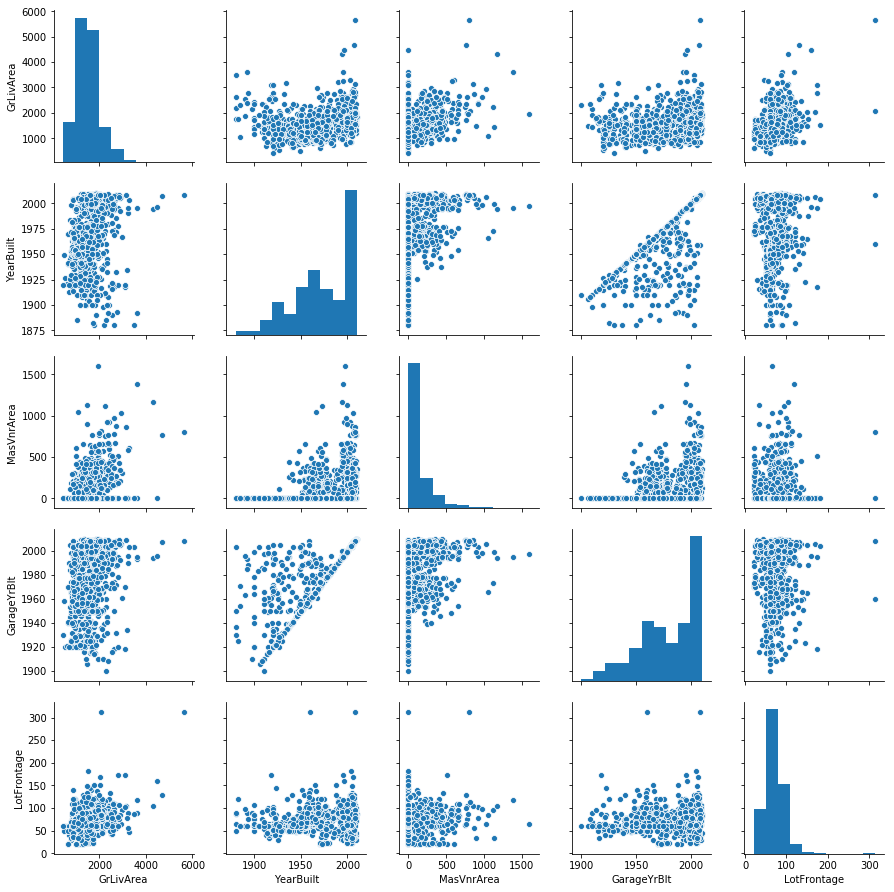

In [39]:
#смотрим корреляции для заполнения пропусков GarageYrBlt
import seaborn as sns
sns.pairplot(data.dropna(subset=['MasVnrArea', 'GarageYrBlt', 'LotFrontage']), vars=['GrLivArea', 'YearBuilt' \
                        #, '1stFlrSF ' \
                         ,'MasVnrArea', \
                         'GarageYrBlt', \
                         'LotFrontage' \
                            ],
                 kind='scatter', dropna=True)

In [40]:
corr_matrix = data.corr()
corr_matrix["GarageYrBlt"].sort_values(ascending=False)
# заполним пропуски годом постройки самого дома

GarageYrBlt      1.000000
YearBuilt        0.825667
YearRemodAdd     0.642277
GarageCars       0.588920
GarageArea       0.564567
OverallQual      0.547766
SalePrice        0.486362
FullBath         0.484557
TotalBsmtSF      0.322445
MasVnrArea       0.252691
1stFlrSF         0.233449
GrLivArea        0.231197
OpenPorchSF      0.228425
WoodDeckSF       0.224577
HalfBath         0.196785
BsmtUnfSF        0.190708
BsmtFinSF1       0.153484
TotRmsAbvGrd     0.148112
BsmtFullBath     0.124553
MSSubClass       0.085072
2ndFlrSF         0.070832
LotFrontage      0.070250
Fireplaces       0.046822
3SsnPorch        0.023544
MoSold           0.005337
Id               0.000072
YrSold          -0.001014
PoolArea        -0.014501
LotArea         -0.024947
MiscVal         -0.032417
LowQualFinSF    -0.036363
BedroomAbvGr    -0.064518
ScreenPorch     -0.075418
BsmtHalfBath    -0.077464
BsmtFinSF2      -0.088011
KitchenAbvGr    -0.124411
EnclosedPorch   -0.297003
OverallCond     -0.324297
Name: Garage

In [12]:
corr_matrix["MasVnrArea"].sort_values(ascending=False)

MasVnrArea       1.000000
SalePrice        0.477493
OverallQual      0.411876
GrLivArea        0.390857
GarageArea       0.373066
GarageCars       0.364204
TotalBsmtSF      0.363936
1stFlrSF         0.344501
YearBuilt        0.315707
TotRmsAbvGrd     0.280682
FullBath         0.276833
BsmtFinSF1       0.264736
GarageYrBlt      0.252691
Fireplaces       0.249070
HalfBath         0.201444
LotFrontage      0.193458
YearRemodAdd     0.179618
2ndFlrSF         0.174561
WoodDeckSF       0.159718
OpenPorchSF      0.125703
BsmtUnfSF        0.114442
LotArea          0.104160
BedroomAbvGr     0.102821
BsmtFullBath     0.085310
ScreenPorch      0.061466
BsmtHalfBath     0.026673
MSSubClass       0.022936
3SsnPorch        0.018796
PoolArea         0.011723
MoSold          -0.005965
YrSold          -0.008201
MiscVal         -0.029815
KitchenAbvGr    -0.037610
Id              -0.050298
LowQualFinSF    -0.069071
BsmtFinSF2      -0.072319
EnclosedPorch   -0.110204
OverallCond     -0.128101
Name: MasVnr

In [13]:
corr_matrix["LotFrontage"].sort_values(ascending=False)

LotFrontage      1.000000
1stFlrSF         0.457181
LotArea          0.426095
GrLivArea        0.402797
TotalBsmtSF      0.392075
TotRmsAbvGrd     0.352096
SalePrice        0.351799
GarageArea       0.344997
GarageCars       0.285691
Fireplaces       0.266639
BedroomAbvGr     0.263170
OverallQual      0.251646
BsmtFinSF1       0.233633
PoolArea         0.206167
FullBath         0.198769
MasVnrArea       0.193458
OpenPorchSF      0.151972
BsmtUnfSF        0.132644
YearBuilt        0.123349
BsmtFullBath     0.100949
YearRemodAdd     0.088866
WoodDeckSF       0.088521
2ndFlrSF         0.080177
GarageYrBlt      0.070250
3SsnPorch        0.070029
HalfBath         0.053532
BsmtFinSF2       0.049900
ScreenPorch      0.041383
LowQualFinSF     0.038469
MoSold           0.011200
EnclosedPorch    0.010700
YrSold           0.007450
MiscVal          0.003368
KitchenAbvGr    -0.006069
BsmtHalfBath    -0.007234
Id              -0.010601
OverallCond     -0.059213
MSSubClass      -0.386347
Name: LotFro

In [14]:
print(data['MasVnrArea'].mean(), data['LotFrontage'].mean())

103.68526170798899 70.04995836802665


In [459]:
#год заменям на год
data['GarageYrBlt'].fillna(data['YearBuilt'], inplace=True)

#остальное - на среднее
data['MasVnrArea'].fillna(103.685, inplace=True) 
data['LotFrontage'].fillna(70.049958, inplace=True)

In [460]:
y = data['SalePrice'].copy()

In [461]:
data.drop(columns='SalePrice', inplace=True)

In [60]:
from sklearn.preprocessing import StandardScaler

In [462]:
columns_to_get_dummies=['MSZoning', 'Street', 
    'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
    'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 
    'BldgType', 'HouseStyle', 'RoofStyle', 
    'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 
    'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 
    'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 
    'GarageFinish', 
    'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 
    'SaleCondition']

In [463]:
data=pd.get_dummies(data, prefix=columns_to_get_dummies)#.shape

In [464]:
data.shape

(1460, 289)

In [78]:
#data.drop(columns=columns_to_get_dummies, axis=1, inplace=True)

In [465]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
data_train_pl_val, data_test, y_train_pl_val, y_test = train_test_split(data, y, test_size=0.1, random_state=42)
data_train, data_val, y_train, y_val = train_test_split(data_train_pl_val, y_train_pl_val, \
                                                        test_size=0.2/0.9, random_state=42)

In [ ]:
#test =hold out

In [466]:
print(data_train.shape, y_train.shape, data_val.shape, y_val.shape, data_test.shape, y_test.shape)

(1022, 289) (1022,) (292, 289) (292,) (146, 289) (146,)


In [12]:
1022/1460

0.7

In [403]:
data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.000000,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.000000,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.000000,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.000000,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.000000,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
5,6,50,85.000000,14115,5,5,1993,1995,0.0,732,...,0,0,0,1,0,0,0,0,1,0
6,7,20,75.000000,10084,8,5,2004,2005,186.0,1369,...,0,0,0,1,0,0,0,0,1,0
7,8,60,70.049958,10382,7,6,1973,1973,240.0,859,...,0,0,0,1,0,0,0,0,1,0
8,9,50,51.000000,6120,7,5,1931,1950,0.0,0,...,0,0,0,1,1,0,0,0,0,0
9,10,190,50.000000,7420,5,6,1939,1950,0.0,851,...,0,0,0,1,0,0,0,0,1,0


In [467]:
sc = StandardScaler()
sc.fit_transform(data)


/home/arseny/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/arseny/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-1.73086488,  0.07337496, -0.22937175, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-1.7284922 , -0.87256276,  0.4519361 , ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-1.72611953,  0.07337496, -0.09311018, ..., -0.11785113,
         0.4676514 , -0.30599503],
       ...,
       [ 1.72611953,  0.30985939, -0.18395123, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 1.7284922 , -0.87256276, -0.09311018, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 1.73086488, -0.87256276,  0.22483349, ..., -0.11785113,
         0.4676514 , -0.30599503]])

In [468]:
data_train = sc.transform(data_train)

/home/arseny/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [469]:
data_test = sc.transform(data_test)
data_val = sc.transform(data_val)

/home/arseny/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.
/home/arseny/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


In [49]:
#data_train.info()
#data_train.head().T

## Данных немного, поэтому необходимо использовать 10-fold кросс-валидацию для оценки качества моделей

In [ ]:
# далее

In [51]:
#data_train.info(max_cols=290)

## Построить случайный лес, вывести важность признаков

In [470]:
from sklearn.ensemble import RandomForestRegressor
#from sklearn.datasets import make_regression

forest = RandomForestRegressor(criterion='mse', max_depth=15, n_estimators=100, max_features='auto')
forest.fit(data_train, y_train)

#n_estimators=’warn’, criterion=’mse’, max_depth=None, min_samples_split=2, 
#min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, 
#max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, 
#bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [164]:
from sklearn.metrics import mean_squared_error

In [53]:
print(forest.score(data_train, y_train)) 
print(forest.score(data_val, y_val))

0.9796352516890622
0.8629691303507347


In [471]:
print(mean_squared_error(forest.predict(data_train), y_train)) 
print(mean_squared_error(forest.predict(data_val), y_val))

139592731.69029394
687107663.3509728


In [ ]:
#слишком много . Встроенная функция неправильно посчитала

In [472]:
print('MSE_train=', np.sqrt(sum((forest.predict(data_train)- y_train)**2))/np.sqrt(len(y_train)))
print('MSE_val=',np.sqrt(sum((forest.predict(data_val)- y_val)**2))/np.sqrt(len(y_val)))

MSE_train= 11814.93680432925
MSE_val= 26212.73857022522


In [168]:
for i in zip(forest.predict(data_val), y_val):
    print(i)

(133122.53214285715, 137000)
(192723.89208380386, 217500)
(222671.89, 164000)
(261646.76, 227000)
(351370.8, 235000)
(217957.89995876251, 221000)
(150701.9732142857, 148000)
(184014.6435913901, 176432)
(240671.56666666668, 233000)
(206558.95641393654, 202500)
(256577.0635714286, 271000)
(234792.26083333333, 201000)
(121744.3888894835, 127000)
(114225.46859991859, 110000)
(294999.4, 235000)
(115476.62077194797, 109900)
(146000.56062271062, 157000)
(130078.5276704656, 122500)
(113750.4431984276, 110000)
(131268.94162544858, 134500)
(124636.24484126983, 90000)
(99605.22944444444, 93000)
(96834.96142857142, 40000)
(142884.32562271063, 98600)
(203073.0, 174000)
(345457.32, 326000)
(186792.07632009088, 176000)
(255812.48285714287, 289000)
(104154.47181172694, 106500)
(123332.47404761903, 85000)
(124424.05075757577, 127500)
(217186.48499999996, 227000)
(105020.10256410256, 82000)
(277248.35666666663, 260000)
(101678.25305860804, 110500)
(116454.7786232247, 112000)
(128813.00626514999, 145000)

In [508]:
list(zip(forest.predict(data_val), y_val))[:][:]

[(141092.68272727274, 137000),
 (190455.62692307692, 217500),
 (222280.6875, 164000),
 (262059.31, 227000),
 (330016.64, 235000),
 (218994.94686322185, 221000),
 (150951.79212454212, 148000),
 (182334.83354119636, 176432),
 (238222.1965594352, 233000),
 (210427.6172385826, 202500),
 (254064.2925576037, 271000),
 (237558.6278723404, 201000),
 (122354.19177109441, 127000),
 (115639.75621345028, 110000),
 (284261.71, 235000),
 (112036.47855729907, 109900),
 (150105.70109298028, 157000),
 (134752.05394640449, 122500),
 (111463.12397479889, 110000),
 (130747.96486079281, 134500),
 (129901.79797077476, 90000),
 (101561.91807017544, 93000),
 (98128.595, 40000),
 (143385.00873015873, 98600),
 (200417.84, 174000),
 (360385.32, 326000),
 (187438.09068562006, 176000),
 (261696.91, 289000),
 (104376.4868440799, 106500),
 (130827.76, 85000),
 (123445.16666666669, 127500),
 (216219.71743924686, 227000),
 (102958.7657142857, 82000),
 (271484.81, 260000),
 (99597.29848484848, 110500),
 (113824.8295497

In [ ]:
#переобучилась. Нужно уменьшать сложность 

In [69]:
for i in sorted(zip(forest.feature_importances_, data.columns), key=lambda x: -x[0]):
    print( i)
    
#sorted(zip(a, b), key=lambda x: x[1])

(0.5515414890830281, 'OverallQual')
(0.11605305297944868, 'GrLivArea')
(0.034796819100152775, '1stFlrSF')
(0.03286130327356027, 'GarageCars')
(0.03219057420327837, '2ndFlrSF')
(0.029514133712185527, 'TotalBsmtSF')
(0.019837316359123836, 'BsmtFinSF1')
(0.014990377051248843, 'GarageArea')
(0.013502978015233652, 'FullBath')
(0.012397484151291487, 'LotArea')
(0.011451526811032987, 'YearBuilt')
(0.006573785559797798, 'LotFrontage')
(0.006450852778447087, 'YearRemodAdd')
(0.005796631403047095, 'OpenPorchSF')
(0.0054925664856117565, 'TotRmsAbvGrd')
(0.005216984160192316, 'Fireplaces')
(0.0050719962316679735, 'BsmtQual_Ex')
(0.004423369883250019, 'MasVnrArea')
(0.0044220996019129375, 'BsmtUnfSF')
(0.0037761957419610004, 'BsmtQual_Gd')
(0.003612785337171595, 'ScreenPorch')
(0.0035099716664641926, 'GarageYrBlt')
(0.003226933315361867, 'Id')
(0.0032118578216603494, 'WoodDeckSF')
(0.0024191832757448203, 'OverallCond')
(0.002343134502501916, 'MoSold')
(0.00218064388368786, 'PoolQC_Ex')
(0.002047104

In [473]:
#взял небольшие глубины деревьев, чтобы снизить сложность. Остальные параметры мало что дают
grid_params = {'max_depth': range(2,15), 
                 #'max_features': range(3,50),
                 #'min_weight_fraction_leaf': (0.0, 0.25, 0.5), 
                 #'min_samples_leaf': range(1,20)
              }

In [474]:
from sklearn.model_selection import RandomizedSearchCV

In [475]:
rand=RandomizedSearchCV(forest, grid_params, n_iter=10, return_train_score=True)
rand.fit(data_train, y_train)

/home/arseny/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'max_depth': range(2, 15)},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=0)

In [476]:
 rand.best_params_

{'max_depth': 11}

In [477]:
rand.cv_results_

{'mean_fit_time': array([1.60674087, 2.21675857, 1.7594529 , 0.67660205, 2.06550328,
        2.11876082, 1.89938052, 1.0335594 , 1.37123171, 1.79009493]),
 'std_fit_time': array([0.01546971, 0.00336165, 0.00444137, 0.00726071, 0.03788298,
        0.01677805, 0.00899433, 0.00134225, 0.09465595, 0.087776  ]),
 'mean_score_time': array([0.01442234, 0.01692009, 0.01424853, 0.00967407, 0.01558081,
        0.01634224, 0.01478577, 0.01084105, 0.01516612, 0.01804725]),
 'std_score_time': array([1.02606486e-03, 1.23614611e-04, 2.76244757e-04, 8.00262891e-05,
        6.98921217e-05, 1.13802083e-04, 1.65803738e-04, 8.41817556e-05,
        4.39964766e-03, 2.80681962e-03]),
 'param_max_depth': masked_array(data=[8, 14, 9, 3, 11, 12, 10, 5, 6, 7],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 8},
  {'max_depth': 14},
  {'max_depth': 9},
  {'max_depth': 3},
  

In [ ]:
#лучший из случайных параметров оказался хуже, чем взятые наугад. 
#Возможно, не стоило для сетки ограничивать min_samples_leaf

In [478]:
#rand.score()
print(rand.score(data_train, y_train)) 
print(rand.score(data_val, y_val))

0.9754887253177262
0.865946706857258


In [479]:
print('MSE_train=', np.sqrt(sum((rand.predict(data_train)- y_train)**2))/np.sqrt(len(y_train)))
print('MSE_val=',np.sqrt(sum((rand.predict(data_val)- y_val)**2))/np.sqrt(len(y_val)))

MSE_train= 12385.600291861767
MSE_val= 26000.437028445987


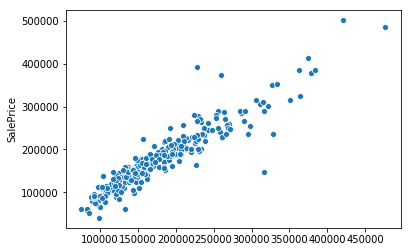

In [480]:
sns.scatterplot(rand.predict(data_val),y_val)

In [481]:
from sklearn.model_selection import cross_val_score

In [482]:
scores = cross_val_score(rand, data_train, y_train, cv=10)#, scoring='accuracy'
print(scores)
print(scores.mean())

/home/arseny/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/arseny/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/arseny/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/arseny/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' ins

[0.88299969 0.81474935 0.88687725 0.85750755 0.88851002 0.80612107
 0.89949894 0.76899664 0.74945203 0.89567628]
0.8450388795535766


## Обучить стекинг как минимум 3х моделей, использовать хотя бы 1 линейную модель и 1 нелинейную

линейная модель

In [483]:

from sklearn.linear_model import LinearRegression

In [484]:
features_for_lin_reg=['OverallQual', 'GrLivArea', '1stFlrSF', 'GarageCars', '2ndFlrSF', 
                        'TotalBsmtSF', 'BsmtFinSF1', 'GarageArea', 'FullBath', 'LotArea', 'YearBuilt', 
                        'LotFrontage', 
                        'YearRemodAdd', 'OpenPorchSF', 'TotRmsAbvGrd', 'Fireplaces','BsmtQual_Ex',
                        'MasVnrArea','BsmtUnfSF']
data[features_for_lin_reg].head()

,OverallQual,GrLivArea,1stFlrSF,GarageCars,2ndFlrSF,TotalBsmtSF,BsmtFinSF1,GarageArea,FullBath,LotArea,YearBuilt,LotFrontage,YearRemodAdd,OpenPorchSF,TotRmsAbvGrd,Fireplaces,BsmtQual_Ex,MasVnrArea,BsmtUnfSF
0,7,1710,856,2,854,856,706,548,2,8450,2003,65.0,2003,61,8,0,0,196.0,150
1,6,1262,1262,2,0,1262,978,460,2,9600,1976,80.0,1976,0,6,1,0,0.0,284
2,7,1786,920,2,866,920,486,608,2,11250,2001,68.0,2002,42,6,1,0,162.0,434
3,7,1717,961,3,756,756,216,642,1,9550,1915,60.0,1970,35,7,1,0,0.0,540
4,8,2198,1145,3,1053,1145,655,836,2,14260,2000,84.0,2000,84,9,1,0,350.0,490


In [128]:
import seaborn as sns

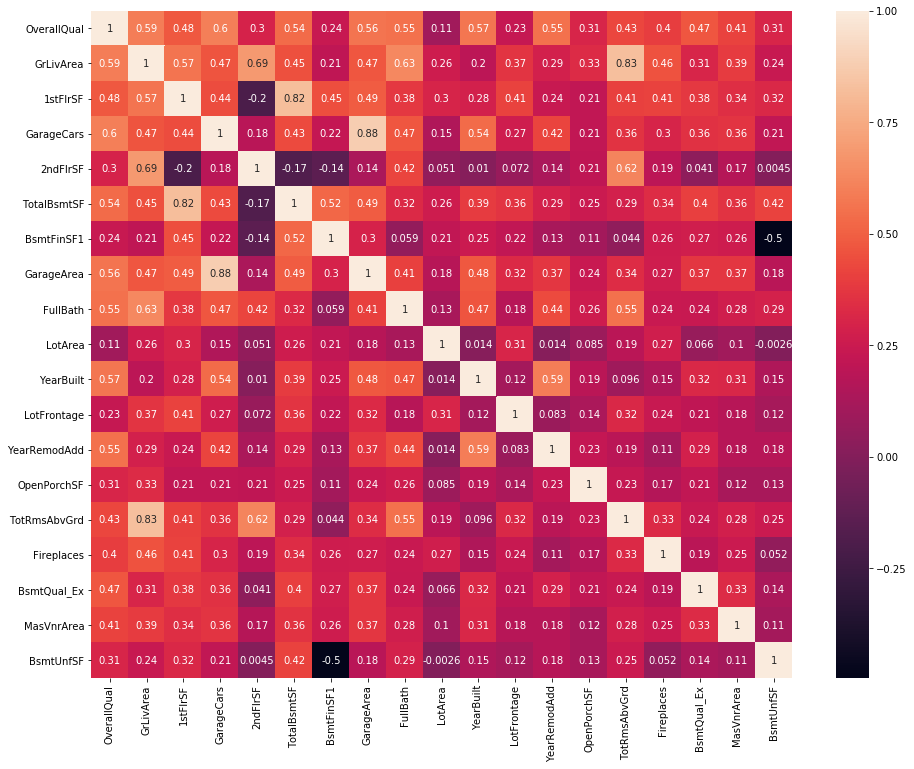

In [129]:
corr=data[features_for_lin_reg].corr()
fig, ax = plt.subplots(figsize=(15.7, 12.27) )        # Sample figsize in inches

sns.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)


In [485]:
#убираем линейно-зависимые (ЛЗ) переменные с меньшим влиянием на цену дома. (ЛЗ - Корреляция больше 60%)
col_to_exclude=['2ndFlrSF', 'TotRmsAbvGrd', 'GarageArea', 'YearRemodAdd', 'TotalBsmtSF']

In [486]:
for i in col_to_exclude:
    features_for_lin_reg.remove(i)

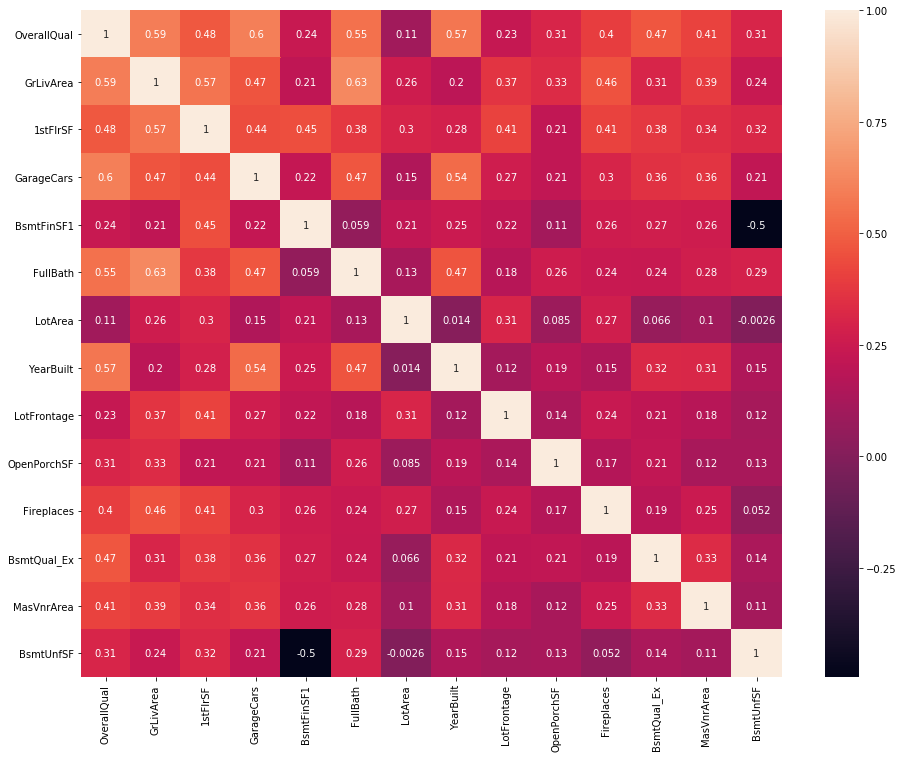

In [136]:
corr=data[features_for_lin_reg].corr()
fig, ax = plt.subplots(figsize=(15.7, 12.27) )        # Sample figsize in inches

sns.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [487]:
data_train=pd.DataFrame(data_train,columns=  data.columns)

In [488]:
data_test=pd.DataFrame(data_test,columns=  data.columns)
data_val=pd.DataFrame(data_val,columns=  data.columns)

In [489]:
lin_regr=LinearRegression()
lin_regr.fit(data_train[features_for_lin_reg], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [491]:
print(lin_regr.score(data_train[features_for_lin_reg], y_train))
print(lin_regr.score(data_val[features_for_lin_reg], y_val))
print(lin_regr.score(data_test[features_for_lin_reg], y_test))

0.7914873447797401
0.838939935890384
0.828957621897844


In [436]:
for i in zip(lin_regr.predict(data_val[features_for_lin_reg]), y_val):
    print(i)

(162370.85307139496, 137000)
(188335.6166245928, 217500)
(218031.10168755185, 164000)
(247628.7254301954, 227000)
(278439.8721196725, 235000)
(217360.92874533636, 221000)
(166458.7349880594, 148000)
(178440.32543231387, 176432)
(221325.14998548443, 233000)
(201886.04911845239, 202500)
(248784.11761412155, 271000)
(229490.1485610044, 201000)
(107474.68065873212, 127000)
(86689.84466856383, 110000)
(252705.72778477304, 235000)
(103462.25284973308, 109900)
(152485.75856649922, 157000)
(143110.6765183266, 122500)
(108072.4934960278, 110000)
(116741.31293113035, 134500)
(120409.51198201216, 90000)
(96244.84063835487, 93000)
(87250.30766747509, 40000)
(140770.48159237677, 98600)
(207862.8458644683, 174000)
(343969.8843931416, 326000)
(193819.22471291578, 176000)
(233678.8907344386, 289000)
(99969.87870231595, 106500)
(62119.78011931147, 85000)
(131556.12176878797, 127500)
(210598.36399117234, 227000)
(79755.96516134814, 82000)
(258783.2368994007, 260000)
(84850.51067564667, 110500)
(119449.0

In [ ]:
#КНН - кажется не линейная модель по переменным

In [492]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor(n_neighbors=5)
knr.fit(data_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [510]:
print(knr.score(data_train, y_train))
print(knr.score(data_val, y_val))
print(knr.score(data_test, y_test))

0.8190930173318188
0.7597805943910368
0.7626211835433021


In [441]:
from sklearn.linear_model import Lasso

In [494]:
lassoreg = Lasso(alpha=150.0, normalize=True, max_iter=1e5)
lassoreg.fit(data_train, y_train)
#    y_pred_tr = lassoreg.predict(X)

Lasso(alpha=150.0, copy_X=True, fit_intercept=True, max_iter=100000.0,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [279]:
lassoreg.coef_

array([ 0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  1.27431733e+03,
        2.10595910e+04,  0.00000000e+00,  2.54387331e+03,  2.20126171e+03,
        9.54628379e+00,  3.39699445e+03,  0.00000000e+00, -0.00000000e+00,
        6.67179565e+03,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        2.22319011e+04,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        2.33755531e+03,  0.00000000e+00,  5.64216163e+03,  1.48975019e+03,
        1.10241844e+03,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -1.37396394e+03, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -

In [275]:
for i in sorted(zip(data.columns, lassoreg.coef_),  key=lambda x: -abs(x[1])):
    print(i)

('OverallQual', 22544.54763313699)
('GrLivArea', 20897.700748501018)
('BsmtQual_Ex', 7737.969372707362)
('GarageCars', 6695.970004282874)
('TotalBsmtSF', 6253.468110917852)
('RoofMatl_ClyTile', -5893.472747019461)
('KitchenQual_Ex', 4961.183075021026)
('Condition2_PosN', -3835.298417974035)
('PoolQC_Ex', 2458.207333593608)
('Neighborhood_NoRidge', 2257.497649843343)
('BsmtExposure_Gd', 2233.9190200270914)
('BsmtExposure_No', -2194.467601636006)
('Fireplaces', 2184.6014255700156)
('ExterQual_TA', -2141.494255747234)
('YearBuilt', 1947.3065897550837)
('BsmtFinSF1', 1927.2381985397376)
('YearRemodAdd', 1671.256909758154)
('MSZoning_RM', -1175.8765977412745)
('SaleType_New', 1110.9033822978722)
('GarageArea', 1074.350416929064)
('BsmtFinType1_GLQ', 916.7575703673252)
('WoodDeckSF', 811.316069497232)
('BldgType_1Fam', 697.9522522989834)
('KitchenQual_TA', -624.7500278013365)
('ExterQual_Ex', 269.1003373614099)
('LotArea', 241.7187862611396)
('1stFlrSF', 131.39461778456433)
('Neighborhood_Nr

In [509]:
print(lassoreg.score(data_train, y_train))
print(lassoreg.score(data_val, y_val))
print(lassoreg.score(data_test, y_test))

0.8680521309975021
0.8203278847247384
0.8530105393014191


In [517]:
def get_meta_features(rg, X_train, Y_tr, X_val, X_test, stack_cv):
    meta_train = np.zeros_like(Y_tr, dtype=float)
    meta_vali = np.zeros_like(y_val, dtype=float)
    meta_te = np.zeros_like(y_test, dtype=float)
    
    for i, (train_ind, val_ind) in enumerate(stack_cv.split(X_train, Y_tr)):
        
        rg.fit(X_train.iloc[train_ind], y_train.iloc[train_ind])
        meta_train[val_ind] = rg.predict(X_train.iloc[val_ind])
        meta_vali += rg.predict(X_val)
        meta_te += rg.predict(X_test)
    
    return meta_train, meta_vali / stack_cv.n_splits, meta_te / stack_cv.n_splits

In [516]:
for i, (train_ind, val_ind) in enumerate(stack_cv.split(data_train, y_train)):
    print(i, (train_ind, val_ind) )

/home/arseny/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:626: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


0 (array([  26,   45,   70,   86,   88,   98,  120,  129,  132,  135,  138,
        142,  143,  154,  156,  157,  159,  160,  164,  166,  171,  173,
        176,  181,  182,  183,  184,  185,  187,  190,  193,  194,  197,
        198,  200,  201,  202,  207,  214,  217,  221,  223,  224,  226,
        235,  238,  239,  243,  244,  246,  247,  249,  253,  254,  259,
        262,  264,  265,  267,  269,  273,  277,  281,  282,  291,  296,
        299,  302,  303,  308,  316,  317,  320,  321,  322,  326,  331,
        333,  334,  335,  336,  337,  338,  339,  341,  342,  343,  346,
        347,  348,  353,  358,  360,  363,  366,  369,  370,  371,  374,
        375,  376,  377,  379,  380,  382,  384,  387,  388,  389,  390,
        392,  395,  396,  397,  402,  403,  406,  407,  411,  412,  418,
        420,  422,  432,  435,  437,  439,  446,  448,  451,  452,  454,
        455,  459,  461,  469,  470,  471,  472,  473,  474,  476,  477,
        479,  480,  488,  489,  490,  491,  492,

In [299]:
'''def get_meta_features(rg, X_train, Y_tr, X_val, stack_cv):
    meta_train = np.zeros_like(Y_tr, dtype=float)
    meta_vali = np.zeros_like(y_val, dtype=float)
    #meta_test = np.zeros_like(y_test, dtype=float)
    
    for i, (train_ind, val_ind) in enumerate(stack_cv.split(X_train, Y_tr)):
        
        rg.fit(X_train.iloc[train_ind], y_train.iloc[train_ind])
        meta_train[val_ind] = rg.predict(X_train.iloc[val_ind])
        meta_vali += rg.predict(X_val)
        #meta_test += rg.predict(X_test)
    
    return meta_train, meta_vali / stack_cv.n_splits'''

In [518]:
from sklearn.model_selection import StratifiedKFold

stack_cv = StratifiedKFold(n_splits=10, random_state=555)

meta_train = []
meta_val = []
meta_test = []
col_names = []

print('LR features...')
meta_tr, meta_vali, meta_te = \
    get_meta_features(lin_regr, data_train[features_for_lin_reg], y_train, data_val[features_for_lin_reg], 
                      data_test[features_for_lin_reg],  stack_cv)

meta_train.append(meta_tr)
meta_val.append(meta_vali)
meta_test.append(meta_te)
col_names.append('lr_pred')

print('KNR features...')
meta_tr, meta_vali, meta_te= get_meta_features(knr, data_train, y_train, data_val, data_test, stack_cv)

meta_train.append(meta_tr)
meta_val.append(meta_vali)
meta_test.append(meta_te)
col_names.append('knr_pred')

print('lassoR features...')
meta_tr, meta_vali, meta_te = get_meta_features(lassoreg, data_train, y_train, data_val, data_test, stack_cv)

meta_train.append(meta_tr)
meta_val.append(meta_vali)
meta_test.append(meta_te)
col_names.append('lassoreg_pred')



LR features...


/home/arseny/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:626: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


KNR features...


/home/arseny/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:626: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


lassoR features...


/home/arseny/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:626: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [450]:
#meta_tr, meta_vali, meta_test = get_meta_features(lassoreg, data_train, y_train, data_val, data_test, stack_cv)

In [290]:
'''from sklearn.model_selection import StratifiedKFold

stack_cv = StratifiedKFold(n_splits=10, random_state=555)



"from sklearn.model_selection import StratifiedKFold\n\nstack_cv = StratifiedKFold(n_splits=10, random_state=555)\n\nmeta_train = []\nmeta_val = []\nmeta_test = []\ncol_names = []\n\nprint('LR features...')\nmeta_tr, meta_val, meta_te = get_meta_features(lin_regr, data_train[features_for_lin_reg], y_train, data_val[features_for_lin_reg], data_test[features_for_lin_reg], stack_cv)\n\nmeta_train.append(meta_tr)\nmeta_val.append(meta_vali)\nmeta_test.append(meta_te)\ncol_names.append('lr_pred')\n\nprint('KNR features...')\nmeta_tr, meta_val, meta_te = get_meta_features(knr, data_train, y_train, data_val, data_test, stack_cv)\n\nmeta_train.append(meta_tr)\nmeta_val.append(meta_vali)\nmeta_test.append(meta_te)\ncol_names.append('knr_pred')\n\nprint('lassoR features...')\nmeta_tr, meta_val, meta_te = get_meta_features(lassoreg, data_train, y_train, data_val, data_test, stack_cv)\n\nmeta_train.append(meta_tr)\nmeta_val.append(meta_vali)\nmeta_test.append(meta_te)\ncol_names.append('lassoreg_p

In [519]:
X_meta_train = pd.DataFrame(np.stack(meta_train, axis=1), columns=col_names)
X_meta_val = pd.DataFrame(np.stack(meta_val, axis=1), columns=col_names)
X_meta_test = pd.DataFrame(np.stack(meta_test, axis=1), columns=col_names)

In [537]:
X_meta_train.head()

,lr_pred,knr_pred,lassoreg_pred
0,211745.946328,240400.0,214170.157805
1,247893.924248,212580.0,241634.821896
2,217707.451315,233780.0,234800.979607
3,198165.533642,200980.0,195254.077505
4,168432.371625,157000.0,173094.375840


In [520]:
rgr_lr_meta = LinearRegression()
rgr_lr_meta.fit(X_meta_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [536]:
rgr_lr_meta.coef_

array([0.49393914, 0.69711908, 0.0939726 ])

In [521]:
print(rgr_lr_meta.score(X_meta_train, y_train))
print(rgr_lr_meta.score(X_meta_val, y_val))
print(rgr_lr_meta.score(X_meta_test, y_test))


0.7073024404709704
0.8197014088624107
0.8617741649992015


In [505]:
X_meta_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 3 columns):
lr_pred          292 non-null float64
knr_pred         292 non-null float64
lassoreg_pred    292 non-null float64
dtypes: float64(3)
memory usage: 6.9 KB


In [317]:
from sklearn.metrics import r2_score

In [522]:
y_pred_meta_val = rgr_lr_meta.predict(X_meta_val)
y_pred_meta_test = rgr_lr_meta.predict(X_meta_test)

In [523]:
print(r2_score(y_val, y_pred_meta_val))
print(r2_score(y_test, y_pred_meta_test))

0.8197014088624108
0.8617741649992015


## Для валидации модели 2-го уровня использовать отдельный hold-out датасет, как на занятии

In [527]:
scores = cross_val_score(rgr_lr_meta, X_meta_test, y_test, cv=4)#, scoring='accuracy'
print(scores)
print(scores.mean())

[0.78140659 0.84819959 0.86920079 0.89188472]
0.8476729234659204


## Показать, что использование ансамблей моделей действительно улучшает качество 
(стекинг vs другие модели сравнивать на hold-out)

In [535]:
print('Linear_regr:',lin_regr.score(data_test[features_for_lin_reg], y_test))
print('5NN:',knr.score(data_test, y_test))
print('Lasso:',lassoreg.score(data_test, y_test))

print('Ens: stacking', rgr_lr_meta.score(X_meta_test, y_test))
print('............')
print('Ens: forest', rand.score(data_test, y_test))

Linear_regr: 0.8288779836118134
5NN: 0.7626211835433021
Lasso: 0.8530105393014191
Ens: stacking 0.8617741649992015
............
Ens: forest 0.8864751676101175


## В качестве решения: Jupyter notebook с кодом, комментариями и графиками, ссылка на гитхаб